<div style="  background: linear-gradient(145deg, #0f172a, #1e293b);  border: 4px solid transparent;  border-radius: 14px;  padding: 18px 22px;  margin: 12px 0;  font-size: 26px;  font-weight: 600;  color: #f8fafc;  box-shadow: 0 6px 14px rgba(0,0,0,0.25);  background-clip: padding-box;  position: relative;">  <div style="    position: absolute;    inset: 0;    padding: 4px;    border-radius: 14px;    background: linear-gradient(90deg, #06b6d4, #3b82f6, #8b5cf6);    -webkit-mask:       linear-gradient(#fff 0 0) content-box,       linear-gradient(#fff 0 0);    -webkit-mask-composite: xor;    mask-composite: exclude;    pointer-events: none;  "></div>    <b>Tensors, Layers, and Autoencoders</b>    <br/>  <span style="color:#9ca3af; font-size: 18px; font-weight: 400;">(Introduction to Deep Learning with Keras)</span></div>

## Table of Contents

1. [Accessing Keras Layers and Tensors](#section-1)
2. [Autoencoders: Architecture and Implementation](#section-2)
3. [Introduction to Convolutional Neural Networks (CNNs)](#section-3)
4. [Transfer Learning with ResNet50](#section-4)
5. [Recurrent Neural Networks (RNNs) and LSTMs](#section-5)
6. [Text Preprocessing and LSTM Implementation](#section-6)
7. [Conclusion](#section-7)

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 1. Accessing Keras Layers and Tensors</span><br>

Deep learning models in Keras are composed of layers, and the data flows through these layers in the form of tensors. Understanding how to inspect these layers and define tensors is fundamental to debugging and building complex architectures.

### Accessing Model Layers

Once a model is defined, you can access its individual layers using the `.layers` attribute. This allows you to inspect the input shape, output shape, and the learnable weights (kernels and biases) of that specific layer.

<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> Layers in Keras are indexed. <code>model.layers[0]</code> refers to the first layer (often the input or first hidden layer), <code>model.layers[1]</code> the second, and so on. </div>


### What are Tensors?

Tensors are the primary data structure used in Deep Learning. They are multi-dimensional arrays.
*   **Rank 2 Tensor**: A 2D array (Matrix). Shape: `(samples, features)`.
*   **Rank 3 Tensor**: A 3D array (Cube). Shape: `(samples, time_steps, features)` or `(height, width, channels)`.



In [1]:
import tensorflow as tf
import numpy as np

# Utility function to inspect any tensor
# ------------------------------------------------
def describe_tensor(tensor, name="Tensor"):
    print(f"\n{name}")
    print("-" * 40)
    print("Value:\n", tensor.numpy())
    print("Rank (ndim):", tensor.ndim)
    print("Shape:", tensor.shape)
    print("Dtype:", tensor.dtype)


# Rank 1 Tensor (Vector)
# ------------------------------------------------
T1 = np.array([1, 2, 3, 4, 5])
T1_tensor = tf.constant(T1, dtype=tf.int32)
describe_tensor(T1_tensor, "Rank 1 Tensor")


# Rank 2 Tensor (Matrix)
# ------------------------------------------------
T2 = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
T2_tensor = tf.constant(T2, dtype=tf.int32)
describe_tensor(T2_tensor, "Rank 2 Tensor")


# Rank 3 Tensor (Stack of Matrices)
# ------------------------------------------------
T3_flat = np.arange(1, 28)  # 1 → 27
T3_tensor = tf.constant(T3_flat, dtype=tf.int32)
T3_tensor = tf.reshape(T3_tensor, (3, 3, 3))
describe_tensor(T3_tensor, "Rank 3 Tensor")


# Reshape Rank 3 → Rank 2
# ------------------------------------------------
T3_to_T2 = tf.reshape(T3_tensor, (9, 3))
describe_tensor(T3_to_T2, "Rank 3 reshaped to Rank 2")


# Expand Dimensions (Add Batch Axis)
# ------------------------------------------------
T2_batched = tf.expand_dims(T2_tensor, axis=0)
describe_tensor(T2_batched, "Rank 2 → Rank 3 (Batch Added)")


# Indexing Examples
# ------------------------------------------------
print("\nIndexing Examples")
print("-" * 40)
print("T2[1, 2]:", T2_tensor[1, 2].numpy())
print("T3[0]:\n", T3_tensor[0].numpy())
print("T3[1, 2, 0]:", T3_tensor[1, 2, 0].numpy())

e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):



Rank 1 Tensor
----------------------------------------
Value:
 [1 2 3 4 5]
Rank (ndim): 1
Shape: (5,)
Dtype: <dtype: 'int32'>

Rank 2 Tensor
----------------------------------------
Value:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Rank (ndim): 2
Shape: (3, 3)
Dtype: <dtype: 'int32'>

Rank 3 Tensor
----------------------------------------
Value:
 [[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]
  [25 26 27]]]
Rank (ndim): 3
Shape: (3, 3, 3)
Dtype: <dtype: 'int32'>

Rank 3 reshaped to Rank 2
----------------------------------------
Value:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]
 [16 17 18]
 [19 20 21]
 [22 23 24]
 [25 26 27]]
Rank (ndim): 2
Shape: (9, 3)
Dtype: <dtype: 'int32'>

Rank 2 → Rank 3 (Batch Added)
----------------------------------------
Value:
 [[[1 2 3]
  [4 5 6]
  [7 8 9]]]
Rank (ndim): 3
Shape: (1, 3, 3)
Dtype: <dtype: 'int32'>

Indexing Examples
----------------------------------------
T2[1, 2]: 6
T3[0]:


```
Model
 ├── Layer 0 (Input)
 ├── Layer 1 (Dense)
 ├── Layer 2 (Dense)

```

👉 A model is just a list of layers

- `model.layers` → gives you all layers
- `model.layers[i]` → gives you one specific layer

- **From a layer, you can access:**
    - `weights`
    - `biases`
    - `activation`
    - `name`
    - `input/output` shapes

In [2]:
# 1️ - Imports 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np


# 2 - Create a simple model
model = Sequential([
    Input(shape=(3,)),                 # Input: 3 features
    Dense(2, activation="relu"),        # Hidden layer
    Dense(1)                            # Output layer
])


# 3 -  Compile the model (required to train)
model.compile(
    optimizer="adam",
    loss="mse"
)


# 4 -  Create dummy data
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype=np.float32)

y = np.array([[1], [2], [3]], dtype=np.float32)


# 5️ - Train the model (builds the layers internally)
model.fit(X, y, epochs=3, verbose=1)


# ============================================
# ACCESSING KERAS LAYERS
# ============================================

# 6️ - Get all layers
print("\nAll layers in the model:")
print(model.layers)


# 7️ - Access first Dense layer
first_layer = model.layers[0]
print("\nFirst layer name:", first_layer.name)
print("First layer type:", type(first_layer))


# 8️ - Access layer configuration
print("\nFirst layer configuration:")
print(first_layer.get_config())


# 9️ - Access weights and biases
weights, biases = first_layer.get_weights()

print("\nWeights of first layer:")
print(weights)

print("\nBiases of first layer:")
print(biases)


#  10 - Check shapes (VERY IMPORTANT)
print("\nWeights shape:", weights.shape)
print("Biases shape:", biases.shape)


# 11 - Access kernel and bias directly
print("\nKernel (weights):")
print(first_layer.kernel)

print("\nBias:")
print(first_layer.bias)


# 12 -  Access output shape
print("\nOutput shape of first layer:")
print(first_layer.output.shape)


# 1️3 - Loop through all layers
print("\nLooping through all layers:")
for i, layer in enumerate(model.layers):
    print(f"\nLayer {i}")
    print(" Name:", layer.name)
    print(" Units:", layer.units)
    print(" Activation:", layer.activation)

Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 45.6306
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - loss: 45.3556
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 45.0821

All layers in the model:
[<Dense name=dense, built=True>, <Dense name=dense_1, built=True>]

First layer name: dense
First layer type: <class 'keras.src.layers.core.dense.Dense'>

First layer configuration:
{'name': 'dense', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 2, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'quantization_config': None}

Weight


---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 2. Autoencoders: Architecture and Implementation</span><br>

### **Autoencoder (AE)**

![autoencoder](https://tse2.mm.bing.net/th/id/OIP.QEmCZtruuWwtEOUzew2D4AHaFj?rs=1&pid=ImgDetMain&o=7&rm=3)

An **autoencoder** is a **type of neural network** that learns to **reconstruct its input**.

- **Goal:** `Output ≈ Input`

- **Structure:**

  1. **Encoder** → compresses input into a **smaller, dense representation** (latent space)
  2. **Decoder** → reconstructs the input from this compressed representation

- **Why useful:**

  - **Dimensionality Reduction** → compress data like PCA but nonlinear
  - **Denoising** → remove noise from data
  - **Anomaly Detection** → unusual data has **high reconstruction error**

- **Visual Concept:**

```
Input ---> [Encoder] ---> Latent (compressed) ---> [Decoder] ---> Output
```

- After training, you can use **just the encoder** to get the compressed representation.


### Breaking it into an Encoder

- Once the autoencoder is trained, we often only care about the "compressed" representation (the encoding). 

- We can build a separate model that consists only of the first layer of the autoencoder.



### Encoder-Decoder moodel

```
Input (784) ---> [Encoder] ---> Latent (32) ---> [Decoder] ---> Output (784)
```


=== Autoencoder Summary ===


Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_1 (Dense)         │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_latent (Dense)          │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense_1 (Dense)         │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,968 (820.19 KB)

 Trainable params: 209,968 (820.19 KB)

 Non-trainable params: 0 (0.00 B)


=== Encoder Summary ===


Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense_1 (Dense)         │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_latent (Dense)          │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,608 (408.62 KB)

 Trainable params: 104,608 (408.62 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0580 - val_loss: 0.0318
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0255 - val_loss: 0.0205
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191 - val_loss: 0.0172
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168 - val_loss: 0.0158
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0144
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0142 - val_loss: 0.0134
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0133 - val_loss: 0.0125
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0126 - val_loss: 0.0120
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - val_loss: 0.0116
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0118 - val_loss: 0.0114
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0111
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

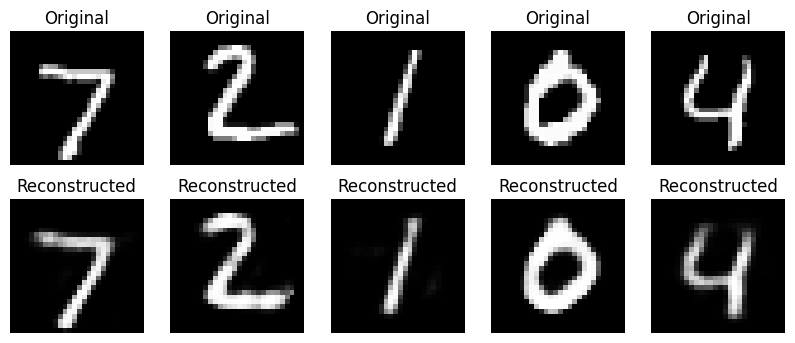

In [ ]:
# =====================================================
# Autoencoder with MNIST digits (Keras 3)
# =====================================================

import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

# -----------------------------------------------------
# 1. Load MNIST Data
# -----------------------------------------------------
(x_train, _), (x_test, _) = mnist.load_data() # _ is placeholder for labels ~ for autoencoders we don't need labels

# Normalize and flatten images (28x28 -> 784)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

INPUT_DIM = 784      # 28x28 flattened
ENCODING_DIM = 32    # compressed representation

# -----------------------------------------------------
# 2. Build Autoencoder Architecture
# -----------------------------------------------------
# Encoder
input_layer = Input(shape=(INPUT_DIM,), name="input_layer")
encoded = Dense(128, activation="relu", name="encoder_dense_1")(input_layer)
encoded = Dense(ENCODING_DIM, activation="relu", name="encoded_latent")(encoded)

# Decoder
decoded = Dense(128, activation="relu", name="decoder_dense_1")(encoded)
decoded = Dense(INPUT_DIM, activation="sigmoid", name="output_layer")(decoded)

# Full Autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoded, name="Autoencoder")

# Encoder Model (extract compressed representation)
encoder = Model(inputs=input_layer, outputs=encoded, name="Encoder")


print("\n=== Autoencoder Summary ===")
autoencoder.summary()

print("\n=== Encoder Summary ===")
encoder.summary()


# -----------------------------------------------------
# 3. Compile Autoencoder
# -----------------------------------------------------
autoencoder.compile(optimizer=Adam(0.001), loss="mse")

# -----------------------------------------------------
# 4. Train Autoencoder
# -----------------------------------------------------
autoencoder.fit(
    x_train, x_train, 
    epochs=20, 
    batch_size=256, 
    shuffle=True,
    validation_data=(x_test, x_test), # using same data for training and validation bcoz we don't have separate validation data
    verbose=1
)

# -----------------------------------------------------
# 5. Encode & Reconstruct
# -----------------------------------------------------
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# -----------------------------------------------------
# 6. Inspect Shapes
# -----------------------------------------------------
print("\nOriginal data shape:", x_test.shape)
print("Encoded (compressed) shape:", encoded_imgs.shape)
print("Reconstructed data shape:", decoded_imgs.shape)

# -----------------------------------------------------
# 7. Sample Reconstruction Error
# -----------------------------------------------------
reconstruction_error = np.mean((x_test - decoded_imgs) ** 2, axis=1)
print("\nSample reconstruction errors:", reconstruction_error[:5])

# -----------------------------------------------------
# 8. Optional: Visualize Some Results
# -----------------------------------------------------
import matplotlib.pyplot as plt

n = 5
plt.figure(figsize=(10,4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title("Original")
    plt.axis("off")
    
    # Reconstructed
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 3. Introduction to Convolutional Neural Networks (CNNs)</span><br>

![cnn](_img/04/01_CNNs.png)

**Convolutional Neural Networks (CNNs) are specialized neural networks for processing images (or any grid-like data).**

- They automatically learn features (like `edges`, `textures`, `shapes`) using convolution filters.
- Pooling layers reduce image size to make computation efficient.
- Flatten + Dense layers combine features to classify images.

### Key Concepts

1. **Filters / Kernels**:
   Small matrices (e.g., 3×3 or 5×5) that slide over the input image to detect features like edges, textures, or patterns.

2. **Feature Learning**:
   CNNs **automatically learn these filters** during training instead of being manually defined.

3. **Architecture Overview**:

   ```
   Input -> Convolution + ReLU -> Pooling -> Convolution + ReLU -> Pooling -> Flatten -> Fully Connected (Dense) -> Softmax
   ```

   * Convolution layers extract features
   * Pooling layers reduce spatial dimensions
   * Dense layers perform classification

4. **Activation Functions**:

   * ReLU (Rectified Linear Unit) in convolution layers
   * Softmax in output layer to get probabilities for 10 CIFAR-10 classes

---

### CIFAR-10 Image Input Shape

CIFAR-10 images are **Rank 3 tensors**: `(Width, Height, Channels)`

* Example: `(32, 32, 3)` → 32×32 pixels, 3 color channels (RGB)
* CIFAR-10 has **50,000 training images** and **10,000 test images**, across **10 classes**: airplane, car, bird, cat, deer, dog, frog, horse, ship, truck

---

### Building a CNN in Keras for CIFAR-10

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(32, 32, 3)),       # CIFAR-10 image shape
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 CIFAR-10 classes
])
```

#### 1. Input

* **Shape:** `(32, 32, 3)` → Width × Height × Channels (RGB)
* **Tip:** Always normalize pixels to `[0,1]` for faster training



#### 2. Convolution Layer (Conv2D)

* **Purpose:** Detect features like edges, corners, textures
* **Operation:** Filter (kernel) slides over the image → produces a **feature map**
* **Example:** `Conv2D(32, (3,3), activation='relu')`
* **Output Shape:** `(32,32,32)` if padding='same' and stride=1



#### 3. Activation (ReLU)

* **Purpose:** Introduce non-linearity → allows learning complex patterns
* **Function:** `f(x) = max(0, x)`
* **Placed After:** Convolution layers



#### 4. Pooling Layer (MaxPooling2D)

* **Purpose:** Reduce spatial size (width & height) → lowers computation & prevents overfitting
* **Example:** `MaxPooling2D((2,2))`
* **Output:** Reduces feature map size by half (e.g., 32×32 → 16×16)



#### 5. Flatten

* **Purpose:** Convert 2D feature maps into 1D vector
* **Example:** 16×16×64 → 16384 features
* **Placed Before:** Dense layers



#### 6. Fully Connected Layer (Dense)

* **Purpose:** Combine learned features to classify images
* **Example:** `Dense(64, activation='relu')`



#### 7. Output Layer

* **Purpose:** Final classification of CIFAR-10 images
* **Example:** `Dense(10, activation='softmax')`
* **Output:** Probability for each of the 10 classes



#### 8. Quick Architecture Visualization

```
Input (32x32x3)
   ↓
Conv2D(32,3x3) + ReLU
   ↓
MaxPooling2D(2x2)
   ↓
Conv2D(64,3x3) + ReLU
   ↓
MaxPooling2D(2x2)
   ↓
Flatten
   ↓
Dense(64) + ReLU
   ↓
Dense(10) + Softmax
```


In [ ]:
# =====================================================
# CNN with CIFAR-10 Dataset 
# =====================================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10


# -----------------------------------------------------
# 1. Load CIFAR-10 Dataset
# -----------------------------------------------------
# CIFAR-10:
# - 60,000 color images
# - Image shape: (32, 32, 3)
# - 10 classes (airplane, car, bird, cat, etc.)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# -----------------------------------------------------
# 2. Normalize Pixel Values
# -----------------------------------------------------
# Pixel range: [0, 255] → [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Training images shape:", x_train.shape)   # (50000, 32, 32, 3)
print("Training labels shape:", y_train.shape)   # (50000, 1)
print("Test images shape:", x_test.shape)       # (10000, 32, 32, 3)
print("Test labels shape:", y_test.shape)       # (10000, 1)

e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [ ]:
# -----------------------------------------------------
# 3. Build CNN Architecture
# -----------------------------------------------------
model = Sequential([

    # Input layer
    Input(shape=(32, 32, 3)),   # RGB image

    # ---- Convolution Block 1 ----
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    # ---- Convolution Block 2 ----
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    # ---- Fully Connected Layers ----
    Flatten(),                       # Convert 3D → 1D
    Dense(64, activation="relu"),    
    Dense(10, activation="softmax")  # 10 classes
])


# -----------------------------------------------------
# 4. Compile the Model
# -----------------------------------------------------
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


# -----------------------------------------------------
# 5. Model Summary (VERY IMPORTANT)
# -----------------------------------------------------
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# -----------------------------------------------------
# 6. Train the CNN
# -----------------------------------------------------
model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.4632 - loss: 1.4876 - val_accuracy: 0.5696 - val_loss: 1.2153
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6010 - loss: 1.1343 - val_accuracy: 0.6300 - val_loss: 1.0656
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6547 - loss: 0.9909 - val_accuracy: 0.6633 - val_loss: 0.9757
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6859 - loss: 0.9078 - val_accuracy: 0.6571 - val_loss: 0.9968
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7086 - loss: 0.8406 - val_accuracy: 0.6815 - val_loss: 0.9448


### Evaluate & Predict

313/313 - 1s - 5ms/step - accuracy: 0.6815 - loss: 0.9448

Test accuracy: 0.6815
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


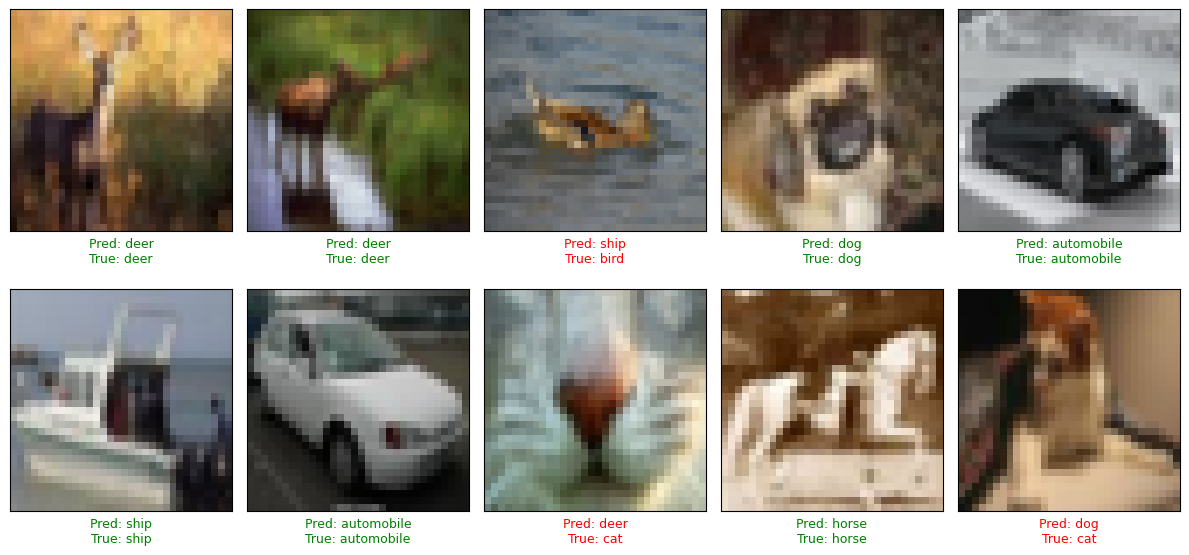

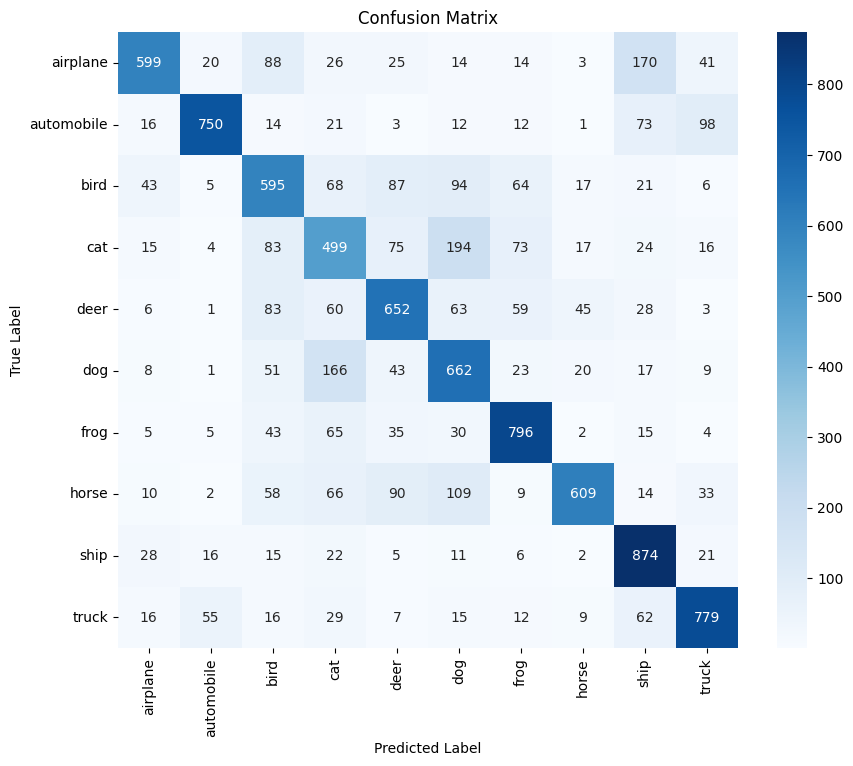


Classification Report:

              precision    recall  f1-score   support

    airplane       0.80      0.60      0.69      1000
  automobile       0.87      0.75      0.81      1000
        bird       0.57      0.59      0.58      1000
         cat       0.49      0.50      0.49      1000
        deer       0.64      0.65      0.64      1000
         dog       0.55      0.66      0.60      1000
        frog       0.75      0.80      0.77      1000
       horse       0.84      0.61      0.71      1000
        ship       0.67      0.87      0.76      1000
       truck       0.77      0.78      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# -----------------------------------------------------
# 7. Evaluate on Test Data
# -----------------------------------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# -----------------------------------------------------
# 8. Generate Predictions
# -----------------------------------------------------
# Get probability distributions
predictions = model.predict(x_test)

# Convert probabilities to class labels (0-9)
predicted_classes = np.argmax(predictions, axis=1)

# Flatten y_test to match predicted_classes shape
y_true = y_test.flatten()


# -----------------------------------------------------
# 9. Visualize Predictions
# -----------------------------------------------------
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample_predictions(x, y_true, y_pred, classes, num_samples=10):
    plt.figure(figsize=(12, 6))
    # Pick random indices
    indices = np.random.choice(len(x), num_samples, replace=False)
    
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[idx])
        plt.xticks([])
        plt.yticks([])
        
        true_label = classes[y_true[idx]]
        pred_label = classes[y_pred[idx]]
        
        # Green for correct, Red for wrong
        color = 'green' if true_label == pred_label else 'red'
        plt.xlabel(f"Pred: {pred_label}\nTrue: {true_label}", color=color, fontsize=9)
    
    plt.tight_layout()
    plt.show()

plot_sample_predictions(x_test, y_true, predicted_classes, class_names)


# -----------------------------------------------------
# 10. Confusion Matrix
# -----------------------------------------------------
cm = confusion_matrix(y_true, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print detailed Classification Report (Precision, Recall, F1)
print("\nClassification Report:\n")
print(classification_report(y_true, predicted_classes, target_names=class_names))

---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 4. Transfer Learning with ResNet50</span><br>

**What is ResNet50 (in simple terms)?**

ResNet50 is:

- A 50-layer deep CNN
- Trained on ImageNet (≈ 1.2 million images, 1000 classes)
- Famous for residual connections → allows very deep networks to train properly
>Instead of training from scratch, we reuse its knowledge.

**Why image preprocessing is mandatory?**

ResNet50 was trained with:
- Image size: 224 × 224
- Color order: RGB

Pixel normalization: specific mean subtraction
- If you don’t match this format:
- Predictions become garbage

```text
# ==========================================
# Image Processing Pipeline
# ==========================================
# 1. `image.load_img`      : Load image from disk (returns PIL image)
# 2. `img_to_array`        : Convert PIL image -> NumPy array (3D tensor)
# 3. `preprocess_input`    : Normalize pixel values (Zero-center, RGB/BGR shift)
# 4. `ResNet50`            : Run the image through the pretrained model
# 5. `decode_predictions`  : Map output probabilities -> Class names (e.g., "Tiger")
```


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


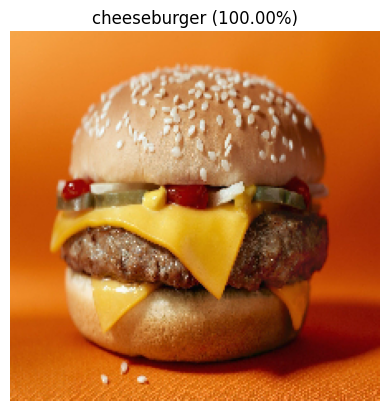

Prediction: cheeseburger
Confidence: 100.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

# Image path (must exist)
img_path = "_img/04/test_img.jpg"

# Load and preprocess - ResNet50 expects images in a specific format and size (224x224)
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Load pretrained ResNet50
model = ResNet50(weights="imagenet")

# Predict
preds = model.predict(img_array)
label, description, confidence = decode_predictions(preds, top=1)[0][0]

# Display image
plt.imshow(img)
plt.axis("off")
plt.title(f"{description} ({confidence:.2%})")
plt.show()

# Print prediction
print(f"Prediction: {description}")
print(f"Confidence: {confidence:.2%}")

**What is Transfer Learning**?

Imagine you want to learn to ride a motorcycle. If you already know how to ride a bicycle, you don't start from zero. you "transfer" your knowledge of balance and steering, and only learn the new parts (the engine and gears).

In Deep Learning:
- We take a model (the Base) that has already been trained on a massive dataset (like ImageNet with 1.4 million images).
- We Freeze it so it doesn't forget what it learned (shapes, edges, textures).
- We add a New Head (output layers) specific to our new, smaller dataset.
- We train only the new head.

This code uses the CIFAR-10 dataset (simple images of cars, birds, etc.) but treats it like a complex Transfer Learning task by using a pre-trained MobileNetV2 model.

Loading Data...
Training data shape: (2000, 32, 32, 3)
Test data shape: (500, 32, 32, 3)


Model: "Transfer_Learning_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_2 (Resizing)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Starting Training...
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 393ms/step - accuracy: 0.3800 - loss: 1.8520 - val_accuracy: 0.5680 - val_loss: 1.1786
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 327ms/step - accuracy: 0.6175 - loss: 1.0887 - val_accuracy: 0.6420 - val_loss: 0.9973
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.6875 - loss: 0.8996 - val_accuracy: 0.6600 - val_loss: 0.9299
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.7235 - loss: 0.7931 - val_accuracy: 0.6780 - val_loss: 0.8921
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - accuracy: 0.7695 - loss: 0.6976 - val_accuracy: 0.6700 - val_loss: 0.9043

Performing test prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: dog (Index: 5)
True Class: cat (Index: 3)
Confidence: 39.26%


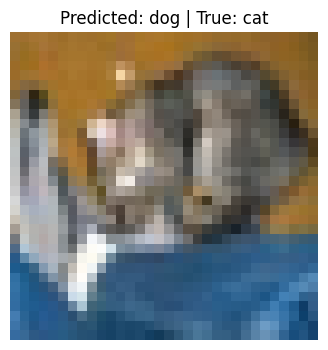

In [54]:
# ==========================================
# IMPORT LIBRARIES
# ==========================================
# Core libraries
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow and Keras imports (recommended approach)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

# ==========================================
# PREPARE DATA
# ==========================================
print("Loading Data...")

# Load CIFAR-10 dataset (10 categories: airplane, car, bird, cat, deer, dog, frog, horse, ship, truck)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1] for better model convergence
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Use smaller subset for faster training (demonstration purposes)
# In production, use full dataset
x_train = x_train[:2000]  # 2000 training images
y_train = y_train[:2000]
x_test = x_test[:500]     # 500 validation images
y_test = y_test[:500]

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# ==========================================
# LOAD PRE-TRAINED BASE MODEL
# ==========================================
# Use MobileNetV2 trained on ImageNet
# include_top=False: Remove the final classification layer (ImageNet has 1000 classes, we need 10)
# input_shape: MobileNetV2 performs better with larger input images

base_model = MobileNetV2(
    weights="imagenet",          # Use ImageNet pre-trained weights
    include_top=False,           # Exclude top classification layer
    input_shape=(128, 128, 3)    # Expected input dimensions (height, width, channels)
)

# Freeze the base model weights to preserve learned features
# These pre-trained weights capture general image patterns
base_model.trainable = False

# ==========================================
# BUILD CUSTOM MODEL
# ==========================================
# Create new model by adding custom layers on top of pre-trained base

# Define input layer for CIFAR-10 images (32x32x3)
inputs = keras.Input(shape=(32, 32, 3))

# Resize images from 32x32 to 128x128 for MobileNetV2 compatibility
x = layers.Resizing(128, 128)(inputs)

# Pass through pre-trained base model
# training=False: Run BatchNormalization layers in inference mode
x = base_model(x, training=False)

# Global Average Pooling: Convert 3D feature maps to 1D feature vector
x = layers.GlobalAveragePooling2D()(x)

# Dropout layer: Randomly drop 20% of connections to prevent overfitting
x = layers.Dropout(0.2)(x)

# Output layer: 10 neurons for CIFAR-10 classes with softmax activation
outputs = layers.Dense(10, activation="softmax")(x)

# Combine all layers into final model
model = keras.Model(inputs, outputs, name="Transfer_Learning_Model")

# Display model architecture (shows trainable vs non-trainable parameters)
model.summary()

# ==========================================
# COMPILE AND TRAIN
# ==========================================
print("\nStarting Training...")

# Configure model for training
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer with learning rate
    loss="sparse_categorical_crossentropy",                # Loss function for integer labels
    metrics=["accuracy"]                                   # Track accuracy during training
)

# Train the model
history = model.fit(
    x_train, y_train,                      # Training data
    epochs=5,                              # Number of complete passes through dataset
    validation_data=(x_test, y_test),     # Validation data for monitoring
    batch_size=32                         # Number of samples per gradient update
)

# ==========================================
# TEST PREDICTION
# ==========================================
print("\nPerforming test prediction...")

# CIFAR-10 class names for interpretation
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Make prediction on first test image
sample_image = x_test[0:1]
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)
true_class = y_test[0][0]

print(f"Predicted Class: {class_names[predicted_class]} (Index: {predicted_class})")
print(f"True Class: {class_names[true_class]} (Index: {true_class})")
print(f"Confidence: {prediction[0][predicted_class]:.2%}")

# Optional: Visualize the prediction
plt.figure(figsize=(6, 4))
plt.imshow(x_test[0])
plt.title(f"Predicted: {class_names[predicted_class]} | True: {class_names[true_class]}")
plt.axis('off')
plt.show()

---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 5. Recurrent Neural Networks (RNNs) and LSTMs</span><br>

### <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #16a374ff, #2802ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">RNNs</span><br>

### What are RNNs?
Standard neural networks assume inputs are independent. RNNs (Recurrent Neural Networks) are designed for sequential data (time series, text, audio). They have a "memory" where the output of a neuron is fed back into itself as input for the next step.

![RNN](_img/04/02_RNNs.png)

Loading data from _datasets/monthly-milk-production-pounds.csv...
            Production
Month                 
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727


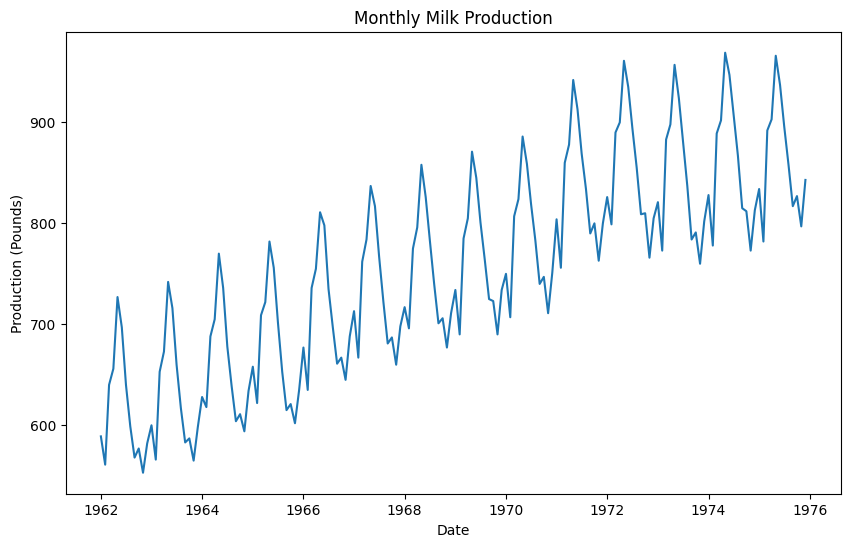

Generator created. Input sequence length: 12
First Input Sequence (normalized): [0.08653846 0.01923077 0.20913462 0.24759615 0.41826923 0.34615385
 0.20913462 0.11057692 0.03605769 0.05769231 0.         0.06971154]
First Target (normalized): [[0.11298077]]

Model Summary:


e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0403
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0105
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0077
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011    
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016  
Epoch 15/50
144/144 ━━━━━━━━

C:\Users\mohdf\AppData\Local\Temp\ipykernel_19308\1784302662.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = true_predictions


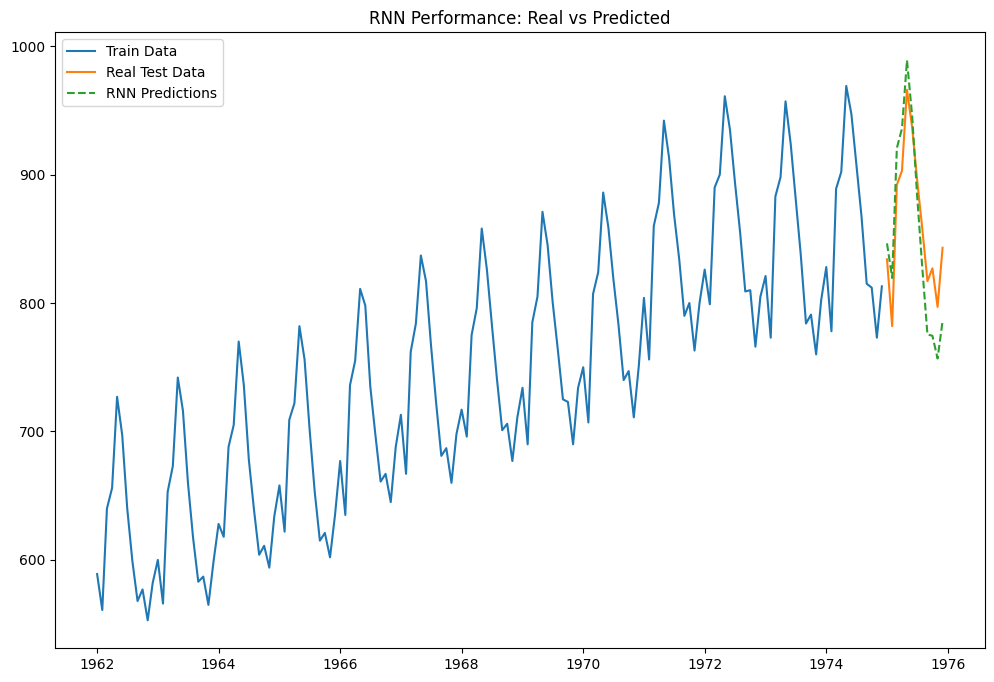

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# ==========================================
# 1. Load and Visualize the Data
# ==========================================
# We use the Monthly Milk Production dataset. 
# It's a simple sequence: Time vs Production.
# Perfect for learning how RNNs capture temporal patterns.

data_path = "_datasets/monthly-milk-production-pounds.csv"
print(f"Loading data from {data_path}...")

df = pd.read_csv(data_path, index_col='Month', parse_dates=True)

# Rename column for easier access
df.columns = ['Production']

# Let's verify the data loaded
print(df.head())

# Plot the data to see the trend and seasonality
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Production'])
plt.title("Monthly Milk Production")
plt.xlabel("Date")
plt.ylabel("Production (Pounds)")
plt.show()

# ==========================================
# 2. Data Preprocessing
# ==========================================
# RNNs work best with normalized data (usually between 0 and 1 or -1 and 1).
# We also need to split into Train and Test sets *chronologically*
# because this is time-series data (we can't shuffle!).

test_size = 12  # We will attempt to predict the last 12 months
train_data = df.iloc[:-test_size]
test_data = df.iloc[-test_size:]

scaler = MinMaxScaler()
scaler.fit(train_data) # Fit only on training data to avoid data leakage

scaled_train = scaler.transform(train_data)
scaled_test = scaler.transform(test_data)

# ==========================================
# 3. Format Data for RNN (The "Sliding Window")
# ==========================================
# An RNN looks at a sequence of 'n_input' steps to predict the next step.
# For example, if n_input=3:
# Input: [Month1, Month2, Month3] -> Target: Month4
# Input: [Month2, Month3, Month4] -> Target: Month5

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12  # Use past 12 months to predict the next 1 month
n_features = 1 # We only have 1 feature (Production)

# Create the generator
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

print(f"Generator created. Input sequence length: {n_input}")
# Let's peek at the first batch to understand it
X, y = generator[0]
print("First Input Sequence (normalized):", X.flatten())
print("First Target (normalized):", y)

# ==========================================
# 4. Build the RNN Model
# ==========================================
# We use a 'SimpleRNN' layer. 
# It processes the sequence step-by-step, maintaining a 'hidden state' (memory).

model = Sequential()

# SimpleRNN layer
# units=100: Number of neurons in the hidden state
# activation='relu': Activation function
# input_shape=(n_input, n_features): (12 time steps, 1 feature per step)
model.add(SimpleRNN(100, activation='relu', input_shape=(n_input, n_features)))

# Dense output layer
# We just want 1 number prediction (the next month's production)
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

print("\nModel Summary:")
model.summary()

# ==========================================
# 5. Train the Model
# ==========================================
print("\nTraining the model...")
model.fit(generator, epochs=50, verbose=1)

# ==========================================
# 6. Evaluate / Predict
# ==========================================
# Now we use the trained model to predict the test sequence (the last 12 months).
# Note: To predict the *first* test point, we need the *last 12 points* of the training data.

test_predictions = []

# Start with the last 'n_input' points from the training set
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    # Get the prediction value for the first batch
    current_pred = model.predict(current_batch, verbose=0)[0]
    
    # Append the prediction into the array
    test_predictions.append(current_pred) 
    
    # Update the batch to include the new prediction and drop the oldest point
    # current_batch[:, 1:, :] is all points except the first one
    # current_pred is the new point to add
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

# Inverse transform predictions back to original scale (pounds)
true_predictions = scaler.inverse_transform(test_predictions)

# ==========================================
# 7. Compare and Visualize
# ==========================================
test_data['Predictions'] = true_predictions

print("\nPrediction Results:")
print(test_data)

plt.figure(figsize=(12, 8))
plt.plot(train_data.index, train_data['Production'], label='Train Data')
plt.plot(test_data.index, test_data['Production'], label='Real Test Data')
plt.plot(test_data.index, test_data['Predictions'], label='RNN Predictions', linestyle='--')
plt.legend()
plt.title("RNN Performance: Real vs Predicted")
plt.show()

### <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #16a374ff, #2802ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">LSTMs</span><br>

### What are LSTMs?

**Long Short-Term Memory (LSTM)** networks are a special kind of RNN capable of learning long-term dependencies. They solve the "vanishing gradient" problem of standard RNNs.

**Internal Structure:**
- **Forget Gate**: Decides what information to throw away from the cell state.
- **Input Gate**: Decides which new information to store in the cell state.
- **Output Gate**: Decides what to output based on the cell state.


### Use Cases for LSTMs
- Image captioning
- Speech to text
- Text translation
- Document summarization
- Text generation
- Musical composition

![LSTM](_img/04/03_LSTMs.png)

Columns found: ['Month', 'Monthly milk production (pounds per cow)']
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 0.1561 - val_loss: 0.0453
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0381 - val_loss: 0.0549
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0336 - val_loss: 0.0523
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0337 - val_loss: 0.0640
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0313 - val_loss: 0.0306
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0253 - val_loss: 0.0292
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0299 - val_loss: 0.0277
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0273 - val_loss: 0.0430
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0264 - val_loss: 0.0347
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0243 - val_loss: 0.0256
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0248 - val_loss: 0.0253
Epoc

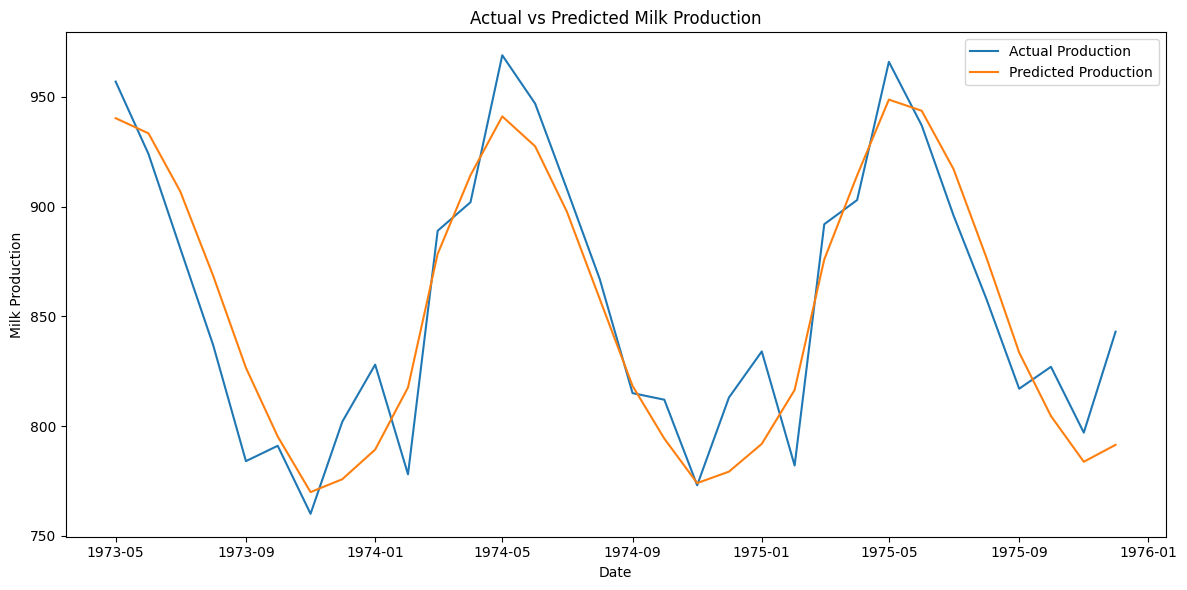

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import LSTM, Input, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


# ---------------------------
# Load data 
# ---------------------------
data = pd.read_csv('_datasets/monthly-milk-production-pounds.csv')

# Identify columns automatically
print("Columns found:", data.columns.tolist())

date_col = data.columns[0]     # time column
value_col = data.columns[1]    # production column

# Convert date column
data[date_col] = pd.to_datetime(data[date_col])
data.set_index(date_col, inplace=True)

# Extract production values
production = data[value_col].astype(float).values.reshape(-1, 1)


# ---------------------------
# Scale data
# ---------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(production)


# ---------------------------
# Create sequences
# ---------------------------
window_size = 12

X, y = [], []
target_dates = data.index[window_size:]

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)


# ---------------------------
# Train-test split (time-series safe)
# ---------------------------
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X,
    y,
    target_dates,
    test_size=0.2,
    shuffle=False
)


# ---------------------------
# Build LSTM model
# ---------------------------
model = Sequential([
    Input(shape=(window_size, 1)),

    LSTM(128, return_sequences=True),
    Dropout(0.2),

    LSTM(128),
    Dropout(0.2),

    Dense(1)
])


model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mean_squared_error")


# ---------------------------
# Train
# ---------------------------
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


# ---------------------------
# Predict
# ---------------------------
predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions).flatten()
y_test = scaler.inverse_transform(y_test).flatten()


# ---------------------------
# Evaluate
# ---------------------------
rmse = np.sqrt(np.mean((y_test - predictions) ** 2))
print(f"RMSE: {rmse:.2f}")


# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test, label="Actual Production")
plt.plot(dates_test, predictions, label="Predicted Production")
plt.title("Actual vs Predicted Milk Production")
plt.xlabel("Date")
plt.ylabel("Milk Production")
plt.legend()
plt.tight_layout()
plt.show()

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 6. Text Preprocessing and LSTM Implementation</span><br>

To feed text into a neural network, we must convert words into numbers.

### Manual Sequence Creation (Sliding Window)

We want to predict the next word in a sequence. We can create training data by sliding a window over the text.

In [5]:
text = 'Hi this is a small sentence'

# We choose a sequence length
seq_len = 3

# Split text into a list of words
words = text.split()
print("Words:", words)

# Make lines
lines = []
for i in range(seq_len, len(words) + 1):
    # Join the previous 3 words to form a sequence
    line = ' '.join(words[i-seq_len:i])
    lines.append(line)

print("\nGenerated Sequences:")
print(lines)


Words: ['Hi', 'this', 'is', 'a', 'small', 'sentence']

Generated Sequences:
['Hi this is', 'this is a', 'is a small', 'a small sentence']



### Tokenization
We use the Keras `Tokenizer` to map words to integers.



In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Instantiate Tokenizer
tokenizer = Tokenizer()

# Fit it on the previous lines
tokenizer.fit_on_texts(lines)

# Turn the lines into numeric sequences
sequences = tokenizer.texts_to_sequences(lines)

print("\nNumeric Sequences:")
print(np.array(sequences))

print("\nWord Index Dictionary:")
print(tokenizer.index_word)



Numeric Sequences:
[[5 3 1]
 [3 1 2]
 [1 2 4]
 [2 4 6]]

Word Index Dictionary:
{1: 'is', 2: 'a', 3: 'this', 4: 'small', 5: 'hi', 6: 'sentence'}



### Building the LSTM Model

We use an **Embedding Layer** to turn positive integers (indexes) into dense vectors of fixed size, followed by an LSTM layer.



In [8]:
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.models import Sequential

model_lstm = Sequential()

# Vocabulary size
# +1 is required because index 0 is reserved for padding
vocab_size = len(tokenizer.index_word) + 1

# Starting with an embedding layer
# input_dim: Size of vocabulary
# output_dim: Dimension of the dense embedding
# Note: input_length is deprecated in Keras 3.x and removed
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=8))

# Adding an LSTM layer
model_lstm.add(LSTM(8))

# Adding a Dense hidden layer
model_lstm.add(Dense(8, activation='relu'))

# Adding an output layer with softmax
# Output size is vocab_size because we are predicting one word out of the whole vocabulary
model_lstm.add(Dense(vocab_size, activation='softmax'))

model_lstm.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 7. Conclusion</span><br>

### Summary of Learning
In this notebook, we have covered the essential building blocks of Deep Learning using Keras:

*   **Basics**: Understanding Tensors (Rank 2 vs Rank 3) and accessing model layers/weights.
*   **Autoencoders**: Building architectures where Input = Output for dimensionality reduction and de-noising.
*   **CNNs**: Using Convolutional layers (`Conv2D`) for image processing and feature extraction.
*   **Transfer Learning**: Leveraging pre-trained models like **ResNet50** to classify images without training from scratch.
*   **RNNs & LSTMs**: Handling sequential data (text) using Long Short-Term Memory networks.
*   **Text Processing**: Using `Tokenizer` and `Embedding` layers to prepare text for Deep Learning models.

### What's Next?
To deepen your expertise, consider exploring the following topics:

1.  **Deep Dive into CNNs**: Advanced architectures (Inception, VGG).
2.  **Deep Dive into LSTMs**: Bidirectional LSTMs, GRUs.
3.  **Keras Functional API**: For building complex models with non-linear topologies (shared layers, multiple inputs/outputs).
4.  **GANs (Generative Adversarial Networks)**: For generating new data (images, art).
5.  **Projects**: Apply these concepts to real-world datasets (Kaggle competitions, etc.).
